# Converting Brazilian KMZ files to GeoJSON

Files were download from IBGE trough ftp connection at ftp.ibge.gov.br  
/organizacao_do_territorio  
  /malhas_territoriais  
    /malhas_de_setores_censitarios__divisoes_intramunicipais  
      /censo_2010  
        /setores_censitarios_kmz  

Set path to kmz files on PATH_KMZ and create a folder to receive the geojson files and set the address to PATH_GEOJSON

In [1]:
import os
import shutil
from zipfile import ZipFile

import pandas as pd
import geopandas as gpd

### Path to KMZ & GeoJSON files

In [2]:
PATH_KMZ = "/home/igor/Data/raw/IBGE/kmz_brazil/"
PATH_GEOJSON = "/home/igor/Data/raw/IBGE/geojson_brazil/"
PATH_TO_GEOJSON_REGION = "/home/igor/Data/raw/IBGE/geojson_brazil/"
PATH_SHP = "/home/igor/Data/raw/IBGE/br_municipios/"

### Extracting Process

In [6]:
for file_name in os.listdir(PATH_KMZ):
    file = file_name.split('.')[0]
    # tmp folder
    os.mkdir('{path}tmp'.format(path=PATH_KMZ))
    # copy to tmp folder
    shutil.copy('{path}{file}.kmz'.format(path=PATH_KMZ, file=file),'{path}tmp/{file}.zip'.format(path=PATH_KMZ, file=file))
    # unzip kmz file
    zipObj = ZipFile('{path}tmp/{file}.zip'.format(path=PATH_KMZ, file=file), 'r')
    zipObj.extractall(path='{path}tmp/'.format(path=PATH_KMZ))
    # rename doc.kml to file_name.kml
    os.rename('{path}tmp/doc.kml'.format(path=PATH_KMZ),'{path}tmp/{file}.kml'.format(path=PATH_KMZ, file=file))
    # convert to geojson
    os.system('k2g {path}tmp/{file}.kml {PATH_GEOJSON}/'.format(path=PATH_KMZ, file = file, PATH_GEOJSON=PATH_GEOJSON))
    # delete tmp folder
    shutil.rmtree('{path}tmp'.format(path=PATH_KMZ))

## Creating brazil regions

In [5]:
def group_regions(region,path=PATH_GEOJSON):
    """Group files by Region 1-Norte, 2-Nordeste, 3-Sudeste, 4-Sul, 5-Centro-Oeste"""
    columns = ['id', 'name', 'description', 'style_url', 'geocodigo_municipio','geocodigo_setor', 'municipio', 'distrito', 'sub_distrito','bairro','geometry']
    gdf_region = gpd.GeoDataFrame()
    for file in os.listdir(path):
        if file[:1] == str(region):
            gdf = gpd.read_file(PATH_GEOJSON+file)
            if len(gdf.columns)==11:
                gdf.columns = columns
            else:
            # SP_leste has only 10 columns, we gonna add the missing sub_distrito
                gdf.columns = ['id', 'name', 'description', 'style_url', 'geocodigo_municipio','geocodigo_setor', 'municipio', 'distrito','bairro','geometry']
                gdf['sub_distrito'] = ""
                gdf = gdf[columns]
            gdf_region = gpd.GeoDataFrame(pd.concat([gdf_region, gdf])).copy()
    return gdf_region

## Norte

In [17]:
gdf_norte = group_regions(1)

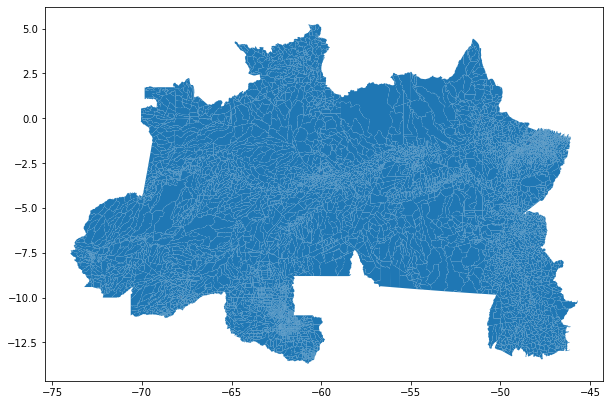

In [18]:
gdf_norte.plot(figsize=(10,30))

In [19]:
gdf_norte.to_file(PATH_TO_GEOJSON_REGION+"norte.geojson", driver='GeoJSON')

## Nordeste

In [20]:
gdf_nordeste = group_regions(2)

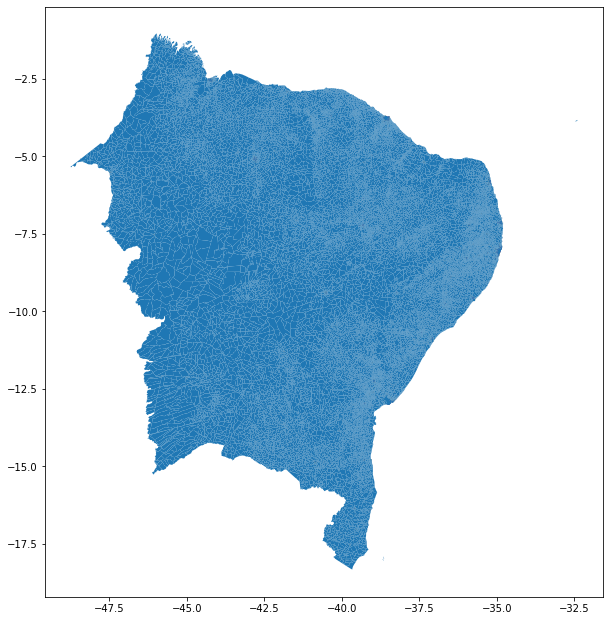

In [21]:
gdf_nordeste.plot(figsize=(10,30))

In [22]:
gdf_nordeste.to_file(PATH_TO_GEOJSON_REGION+"nordeste.geojson", driver='GeoJSON')

## Sudeste

In [ ]:
gdf_sudeste = group_regions(3)

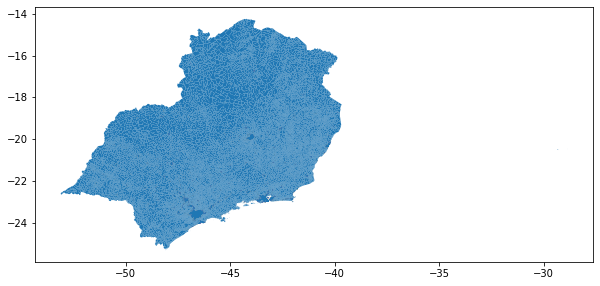

In [8]:
gdf_sudeste.plot(figsize=(10,30))

In [9]:
gdf_sudeste.to_file(PATH_TO_GEOJSON_REGION+"sudeste.geojson", driver='GeoJSON')

## Sul

In [10]:
gdf_sul = group_regions(4)

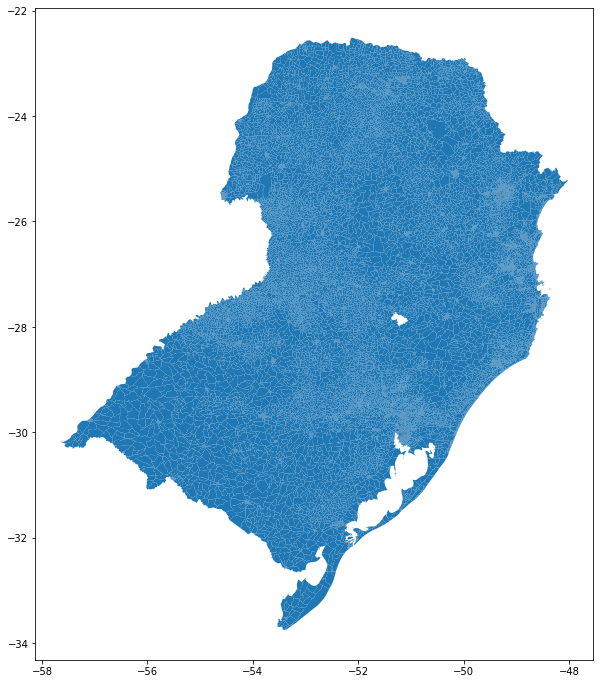

In [11]:
gdf_sul.plot(figsize=(10,30))

In [12]:
gdf_sul.to_file(PATH_TO_GEOJSON_REGION+"sul.geojson", driver='GeoJSON')

## Centro-Oeste

In [13]:
gdf_centro_oeste = group_regions(5)

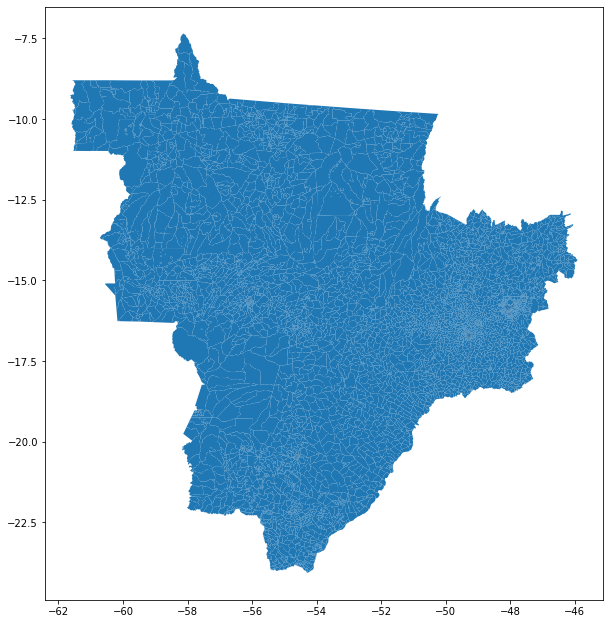

In [14]:
gdf_centro_oeste.plot(figsize=(10,30))

In [15]:
gdf_centro_oeste.to_file(PATH_TO_GEOJSON_REGION+"centro_oeste.geojson", driver='GeoJSON')

## Importing Cities SHP

Importing shape file and converting to geojson  
Files can be [download here](https://ftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/)   
  
  
Define path were files are saved on the PATH_SHP variable

In [3]:
gdf_cities = gpd.read_file(PATH_SHP+'BR_Municipios_2019.shp')

In [5]:
gdf_cities.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3..."
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2..."


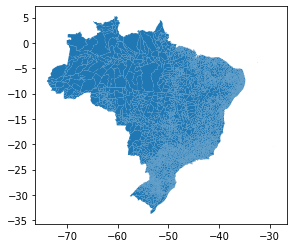

In [6]:
gdf_cities.plot()

In [8]:
gdf_cities.to_file(PATH_TO_GEOJSON_REGION+"municipios.geojson", driver='GeoJSON')

In [5]:
gdf_gj_cities = gpd.read_file(PATH_TO_GEOJSON_REGION+'municipios.geojson')

In [6]:
gdf_gj_cities.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3..."
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2..."


In [8]:
gdf_gj_cities.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich